# Neural Network

In [1]:
# importing packages 
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

%matplotlib inline

## Get IMdb data

In [2]:
# reading data
imdb_data = pd.read_csv("./data/IMDB Dataset.csv")

# processing target variable
imdb_data["sentiment"] = imdb_data["sentiment"].map({"positive": 1, "negative":0})

In [3]:
# splitting data in train and test
imdb_train = imdb_data["review"].values[:25000]
imdb_test = imdb_data["review"].values[25000:]
imdb_train_labels = imdb_data["sentiment"].values[:25000]
imdb_test_labels = imdb_data["sentiment"].values[25000:]

### Hyperparameters

In [4]:
# listing hyperparameters makes it easier to quickly test different combinations
# sentence shorter than max_length it will be padded, longer sentences will be truncated
vocab_size = 10000
embedding_dim = 64
max_length = 120  

## Tokenize

In [5]:
# defining tokenizer
tokenizer = Tokenizer(num_words=10000, oov_token = "<oov>")
tokenizer.fit_on_texts(imdb_train)
word_index = tokenizer.word_index

# converting words to numbers and pad for the neural network to use as input
train_sequences = tokenizer.texts_to_sequences(imdb_train)
train_padded = pad_sequences(train_sequences, maxlen=120, truncating="post")

# tokenized using the word_index learned from the training data
testing_sequences = tokenizer.texts_to_sequences(imdb_test)
test_padded = pad_sequences(testing_sequences, maxlen=120, truncating="post")

## Neural Network

In [6]:
# creating mo\del
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          640000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 640,397
Trainable params: 640,397
Non-trainable params: 0
_________________________________________________________________


In [7]:
# compiling model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
# training model
num_epochs = 5
history = model.fit(train_padded, 
                    imdb_train_labels, 
                    epochs=num_epochs, 
                    validation_data=(test_padded, imdb_test_labels), 
                    validation_steps=30)

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 4s 153us/sample - loss: 0.5110 - accuracy: 0.7713 - val_loss: 0.0142 - val_accuracy: 0.8375
Epoch 2/5
25000/25000 [==============================] - 3s 130us/sample - loss: 0.3109 - accuracy: 0.8706 - val_loss: 0.0132 - val_accuracy: 0.8448
Epoch 3/5
25000/25000 [==============================] - 3s 112us/sample - loss: 0.2572 - accuracy: 0.8970 - val_loss: 0.0133 - val_accuracy: 0.8500
Epoch 4/5
25000/25000 [==============================] - 3s 125us/sample - loss: 0.2242 - accuracy: 0.9129 - val_loss: 0.0141 - val_accuracy: 0.8427
Epoch 5/5
25000/25000 [==============================] - 4s 141us/sample - loss: 0.1997 - accuracy: 0.9245 - val_loss: 0.0149 - val_accuracy: 0.8406


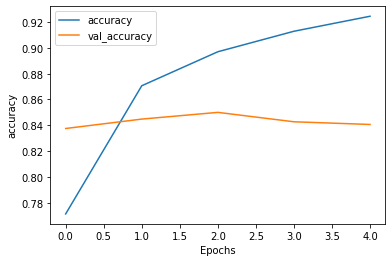

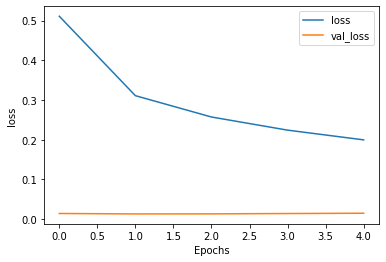

In [9]:
# plotting accuracy and loss
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+ string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
             
plot_graphs(history,'accuracy')
plot_graphs(history, 'loss')

## Convolutional Neural Network

In [10]:
# creating model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 64),
    tf.keras.layers.Conv1D(128, 3, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         24704     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                2064      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 666,785
Trainable params: 666,785
Non-trainable params: 0
_________________________________________________________________


In [11]:
# compiling model
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

### Train the model

In [12]:
# training model
epochs_num = 5
history = model.fit(train_padded, 
                    imdb_train_labels, 
                    epochs=epochs_num,
                    validation_data=(test_padded, imdb_test_labels), 
                    validation_steps=30)

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 7s 295us/sample - loss: 0.6768 - accuracy: 0.6374 - val_loss: 0.0242 - val_accuracy: 0.7104
Epoch 2/5
25000/25000 [==============================] - 7s 271us/sample - loss: 0.5439 - accuracy: 0.7464 - val_loss: 0.0193 - val_accuracy: 0.7563
Epoch 3/5
25000/25000 [==============================] - 7s 289us/sample - loss: 0.4402 - accuracy: 0.7968 - val_loss: 0.0174 - val_accuracy: 0.7885
Epoch 4/5
25000/25000 [==============================] - 7s 275us/sample - loss: 0.3768 - accuracy: 0.8358 - val_loss: 0.0160 - val_accuracy: 0.8083
Epoch 5/5
25000/25000 [==============================] - 7s 277us/sample - loss: 0.3252 - accuracy: 0.8622 - val_loss: 0.0152 - val_accuracy: 0.8219


### Make predictions on text samples

In [13]:
# predicting on a positive sample
sample_text_to_predict = ["The movie was cool. The animation and the graphics were out of this world. I would recommend this movie."]
pos_sequence = tokenizer.texts_to_sequences(sample_text_to_predict)
pos_padded = pad_sequences(pos_sequence, maxlen=20, truncating="post")

# making prediction
prediction = model.predict(pos_padded)
print(prediction)

[[0.8679361]]


In [14]:
# predicting on a negative sample
sample_text_to_predict = ["The movie was not good. The animation and the graphics were terrible. I would not recommend this movie."]
neg_sequence = tokenizer.texts_to_sequences(sample_text_to_predict)
neg_padded = pad_sequences(neg_sequence, maxlen=20, truncating="post")

# making prediction
prediction = model.predict(neg_padded)
print(prediction)

[[0.08392844]]


### Plot learning curves

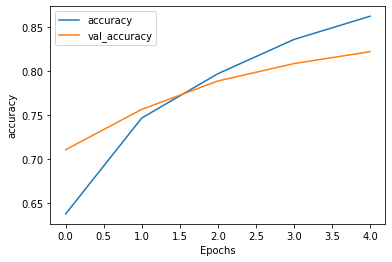

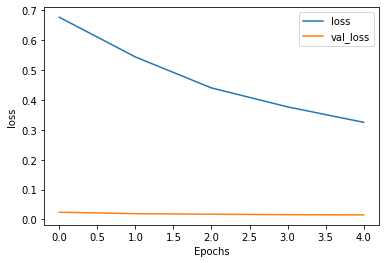

In [15]:
# plotting loss and accuracy
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')